In [55]:
# New notebook because Folium crashed the studnet.ipynb
import pandas as pd
import numpy as np
from scipy import stats
df = pd.read_csv('data/kc_house_data.csv')

In [56]:
# Functions to help convert our object datatypes into int64 / float
# Convert 'waterfront' column to 0's and 1's to represent 'NO' and 'YES'
def map_waterfront_bool(arr):
    if arr == 'YES':
        return 1
    elif arr == 'NO':
        return 0

# Convert 'condition' column into an int64 format from object
def condition_conv(vals):
    if vals == 'Very Good':
        return 5
    elif vals == 'Good':
        return 4
    elif vals == 'Average':
        return 3
    elif vals == 'Fair':
        return 2
    elif vals == 'Poor':
        return 1

# Convert the '?' from "sqft_basement" column to 0 (best to assume they do not have a basement)
def sqft_question(sqft):
    if sqft == '?':
        return 0
    else:
        return sqft

# Convert all 'NONE' views to 0's in order to represent it in a boolean form
def view_bool(views):
    if views == 'NONE':
        return 0
    else:
        return 1

def basement_conv(basement):
    if basement > 0:
        return 1
    else:
        return 0
    
def renovate(yr_reno):
    if yr_reno > 2001:
        return 1
    else:
        return 0

# Convert 'date' column into int64 with year | Unnecessary as we dont really care about the posted date
# Columns for renovation year and built year are much more relevant.
df['date'] = df['date'].str[5:]
df['date'] = df['date'].str.replace('/','').astype(np.int64)

In [57]:
# Call all functions to turn data into a manipulatable format
# First fill missing values in 'waterfront' column to 'NO'
df['waterfront'].fillna('NO', inplace = True)
df['waterfront'] = df['waterfront'].map(map_waterfront_bool)
df['condition'] = df['condition'].map(condition_conv)
df['sqft_basement'] = df['sqft_basement'].map(sqft_question).astype(float)
df['grade'] = df['grade'].str[:2].astype(np.int64)
df['view'] = df['view'].map(view_bool)
df['sqft_basement'] = df['sqft_basement'].map(basement_conv)
# Rename column to more accurately label our new datatype
df.rename({'sqft_basement': 'has_basement'}, inplace = True, axis = 1)
df['yr_renovated'] = df['yr_renovated'].map(renovate)

# Defining a limitation so Folium doesn't crash this notebook
df_below_par = df[df['condition'] < 3]

In [58]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'has_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [59]:
df['living_area'] = df['sqft_living'] / df['sqft_living15']

<AxesSubplot:xlabel='living_area', ylabel='price'>

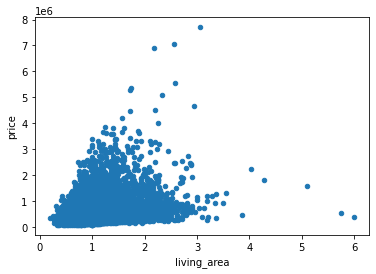

In [60]:
df.filter(['living_area', 'price']).plot(x = 'living_area', y = 'price', kind = 'scatter')

In [64]:
df_prospects = df[(np.abs(stats.zscore(df['living_area'])) < 1)]
# df[(np.abs(stats.zscore(df['price'])) < 1)]
df_prospects = df_prospects[df_prospects['yr_renovated'] == 0]

df_prospects = df_prospects[(np.abs(stats.zscore(df_prospects['price'])) < 2)]
df_prospects = df_prospects[df_prospects['yr_built'] < 2001]
df_prospects

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,has_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,living_area
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0.880597
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0.933333
6,1321400060,2014,257500.0,3,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,0.766309
8,2414600126,2015,229500.0,3,1.00,1780,7470,1.0,0,0,...,1050,1,1960,0,98146,47.5123,-122.337,1780,8113,1.000000
11,9212900260,2014,468000.0,2,1.00,1160,6000,1.0,0,0,...,860,1,1942,0,98115,47.6900,-122.292,1330,6000,0.872180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20764,6300000226,15,380000.0,4,1.00,1200,2171,1.5,0,0,...,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,1.061947
20795,1825079046,2014,580000.0,3,2.50,1820,374616,2.0,0,0,...,1820,0,1999,0,98014,47.6539,-121.959,1870,220654,0.973262
20828,9525600030,2015,631500.0,2,2.50,1780,2493,3.0,0,0,...,1780,0,1981,0,98107,47.6704,-122.358,2050,4400,0.868293
21063,3449000010,2015,294570.0,3,1.00,1140,8400,1.0,0,0,...,1140,0,1960,0,98059,47.5022,-122.144,1400,9000,0.814286


In [63]:
df_prospects['yr_built'].value_counts()

2005    347
2014    345
2004    340
2003    338
1977    322
       ... 
1932     15
1936     14
1933      9
1934      9
1935      7
Name: yr_built, Length: 116, dtype: int64

In [41]:
import numpy as np
#np.mean(df_prospects['price'])


511589.1884931094

In [9]:
import folium

lat = 47.5714
long = -122.191

base_map = folium.Map([lat, long], zoom_start=11)

In [14]:
x = df_waterfront['lat']
y = df_waterfront['long']

points = list(zip(x, y))
for p in points:
    lat = p[0]
    long = p[1]
    popup_text = "Latitude: {}, Longitude: {}".format(lat,long)
    popup = folium.Popup(popup_text, parse_html=True)
    marker = folium.Marker(location=[lat, long], popup=popup)
    marker.add_to(base_map)

folium.CircleMarker(
    location=[47.453327, -122.107446],
    radius=50,
    popup="Laurelhurst Park",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(base_map)

folium.CircleMarker(
    radius=50,
    location=[47.344300, -122.279052],
    popup="The Waterfront",
    color="crimson",
    fill=False,
).add_to(base_map)

In [15]:
base_map